In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = all_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data = model_data.dropna(subset=["PM2.5"])
model_data

# X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
# y = model_data['PM2.5']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002,random_state=42)

,stacja,rok,miesiąc,dzień,temperatura,suma opadów,wilgotność,prędkość wiatru,zachmurzenine,PM2.5
0,KRAKÓW-OBSERWATORIUM,2014,1,1,0.3,0.0,94.5,0.7,7.3,94.0
1,KRAKÓW-OBSERWATORIUM,2014,1,2,-1.5,0.0,89.5,1.0,4.3,135.0
2,KRAKÓW-OBSERWATORIUM,2014,1,3,2.0,0.0,88.5,0.3,1.7,172.0
3,KRAKÓW-OBSERWATORIUM,2014,1,4,2.7,1.7,88.5,0.3,6.0,135.0
4,KRAKÓW-OBSERWATORIUM,2014,1,5,7.0,0.9,87.8,0.7,7.0,68.0
...,...,...,...,...,...,...,...,...,...,...
3525,KRAKÓW-OBSERWATORIUM,2023,8,27,22.2,0.5,85.3,0.7,3.7,9.9
3526,KRAKÓW-OBSERWATORIUM,2023,8,28,19.7,0.1,89.5,1.7,8.0,8.4
3527,KRAKÓW-OBSERWATORIUM,2023,8,29,21.0,0.9,89.0,1.0,7.7,10.2
3528,KRAKÓW-OBSERWATORIUM,2023,8,30,18.5,0.3,89.5,1.3,7.7,8.4


In [2]:
import optuna
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def objective(trial):
    X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
    y = model_data["PM2.5"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)

    hidden_layer_sizes = [trial.suggest_int('n_units1', 2, 100),
                          trial.suggest_int('n_units2', 2, 100)]
    activation = trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
    alpha = trial.suggest_float('alpha', 1e-5, 1.0,log=True)

    model = MLPRegressor(max_iter=10000,hidden_layer_sizes=hidden_layer_sizes, activation=activation, alpha=alpha, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    return r2

study = optuna.create_study(direction='maximize')

improvement_threshold = 0.001
stale_count = 0

best_r2 = -float('inf')

r2_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value > best_r2:
        best_r2 = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    r2_values.append(best_r2)

    if stale_count >= 11000 or best_r2 >= 1.0:
        break

best_params = study.best_params
best_r2 = study.best_value

print("Najlepsze parametry:", best_params)
print("Najlepszy R^2 Score:", best_r2)


[I 2023-10-23 07:11:49,065] A new study created in memory with name: no-name-7a194dfb-e80d-44e3-915f-aa6a9a7e1ab5
[I 2023-10-23 07:11:53,259] Trial 0 finished with value: 0.8787790814836653 and parameters: {'n_units1': 23, 'n_units2': 69, 'activation': 'relu', 'alpha': 0.42243237428545727}. Best is trial 0 with value: 0.8787790814836653.
[I 2023-10-23 07:12:20,422] Trial 1 finished with value: 0.8520004199629568 and parameters: {'n_units1': 96, 'n_units2': 67, 'activation': 'logistic', 'alpha': 0.0003622154806975159}. Best is trial 0 with value: 0.8787790814836653.
[I 2023-10-23 07:12:28,474] Trial 2 finished with value: 0.8875526800162755 and parameters: {'n_units1': 47, 'n_units2': 22, 'activation': 'logistic', 'alpha': 6.242052924897249e-05}. Best is trial 2 with value: 0.8875526800162755.
[I 2023-10-23 07:12:33,456] Trial 3 finished with value: 0.8802854327230445 and parameters: {'n_units1': 77, 'n_units2': 63, 'activation': 'relu', 'alpha': 8.21198066379521e-05}. Best is trial 2 w

Średni błąd kwadratowy (MSE): 30.539041240123854
Procentowa zgodność: 95.15%


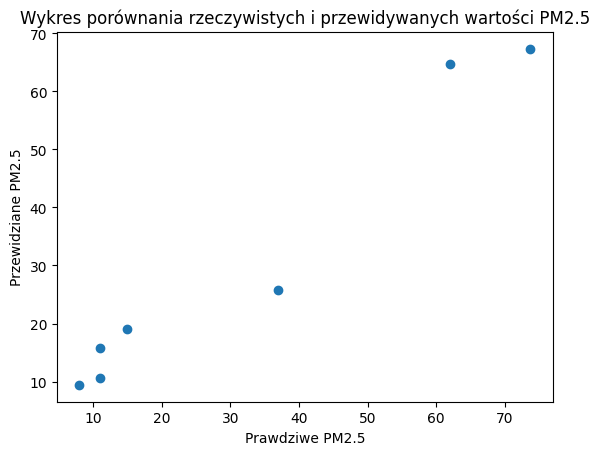

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
194,11.00,15.857336,-4.857336
2194,10.98,10.568718,0.411282
3276,73.73,67.330233,6.399767
199,15.00,18.982362,-3.982362
1091,8.00,9.414882,-1.414882
80,37.00,25.851729,11.148271
2602,62.02,64.648378,-2.628378


In [8]:
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

{'n_units1': 86, 'n_units2': 7, 'activation': 'tanh', 'alpha': 0.03535368780463305}
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data["PM2.5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)


model = MLPRegressor(max_iter=10000,hidden_layer_sizes=[86,7],activation='tanh',alpha=0.03535368780463305,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

plt.scatter(y_test, y_pred)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results



